# overfitting regression

# 1.0 synthetic regression data


In [20]:
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection as ms

In [15]:
hidden_law = np.vectorize(lambda x: math.sin(2*math.pi*x))
x_all = np.arange(0, 1, 0.01)
y_hidden = hidden_law(x_all)

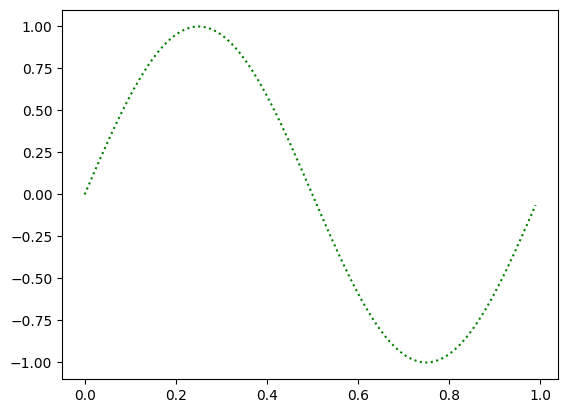

In [16]:
plt.plot(x_all, y_hidden, ':g')

In [21]:
np.random.seed(42)
noise = 0.2
samples = 20

#dataset
x = np.random.rand(samples)
y = np.sin (2*np.pi*x) + noise*np.random.randn(samples)

# split training and test dataset
x_train, x_val, y_train, y_val = ms.train_test_split(x, y, test_size=0.3)


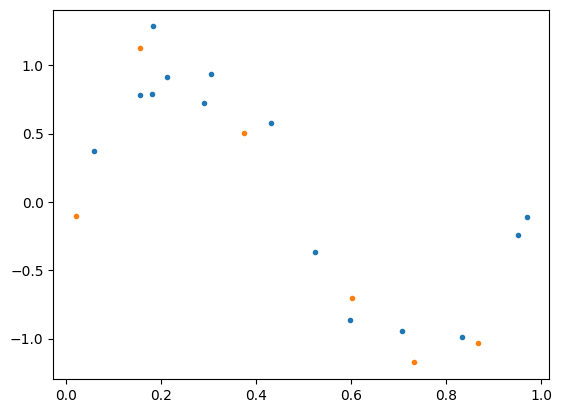

In [25]:
#plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_val, y_val, '.')

# treinamento

In [44]:
max_poly_degrees = 14
poly_degrees = range(max_poly_degree)

polys = []
for p in poly_degrees:
    
    poly_model = np.polyfit(x_train, y_train, p)
    polys.append(poly_model)

In [45]:
rmse_train = np.zeros(max_poly_degree)
rmse_val = np.zeros(max_poly_degree)

for p in poly_degrees:
    #predict over training dataset
    yhat_train = np.polyval(polys[p], x_train)
    rmse_train[p] = np.sqrt(np.mean(np.square((yhat_train - y_train))))

    #predict over validation dataset
    yhat_val = np.polyval(polys[p], x_val)
    rmse_val[p] = np.sqrt(np.mean(np.square((yhat_val - y_val))))


    

In [46]:
rmse_val

array([9.38249133e-01, 6.80235128e-01, 7.51630234e-01, 1.19254271e-01,
       1.18417510e-01, 1.92706777e-01, 1.85985915e-01, 2.64711881e-01,
       6.29967450e-01, 1.56191945e+00, 4.41637163e+00, 1.40669828e+01,
       4.05832450e+01, 9.73114510e+03])

In [47]:
rmse_train

array([7.48010894e-01, 4.82647443e-01, 4.57500886e-01, 1.59419591e-01,
       1.59306546e-01, 1.52223867e-01, 1.52144501e-01, 1.42795708e-01,
       1.39346325e-01, 1.10233380e-01, 1.02983626e-01, 9.76163692e-02,
       9.21585965e-02, 9.50572293e-05])

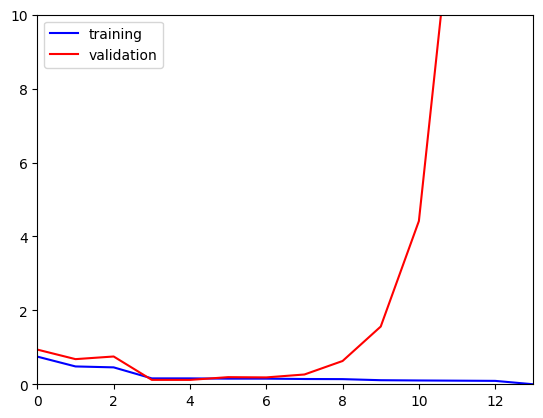

In [48]:
plt.plot(poly_degrees, rmse_train, 'b')
plt.plot(poly_degrees, rmse_val, 'r')
plt.axis((0, max_poly_degrees-1, 0, 10))
plt.legend(['training', 'validation'])

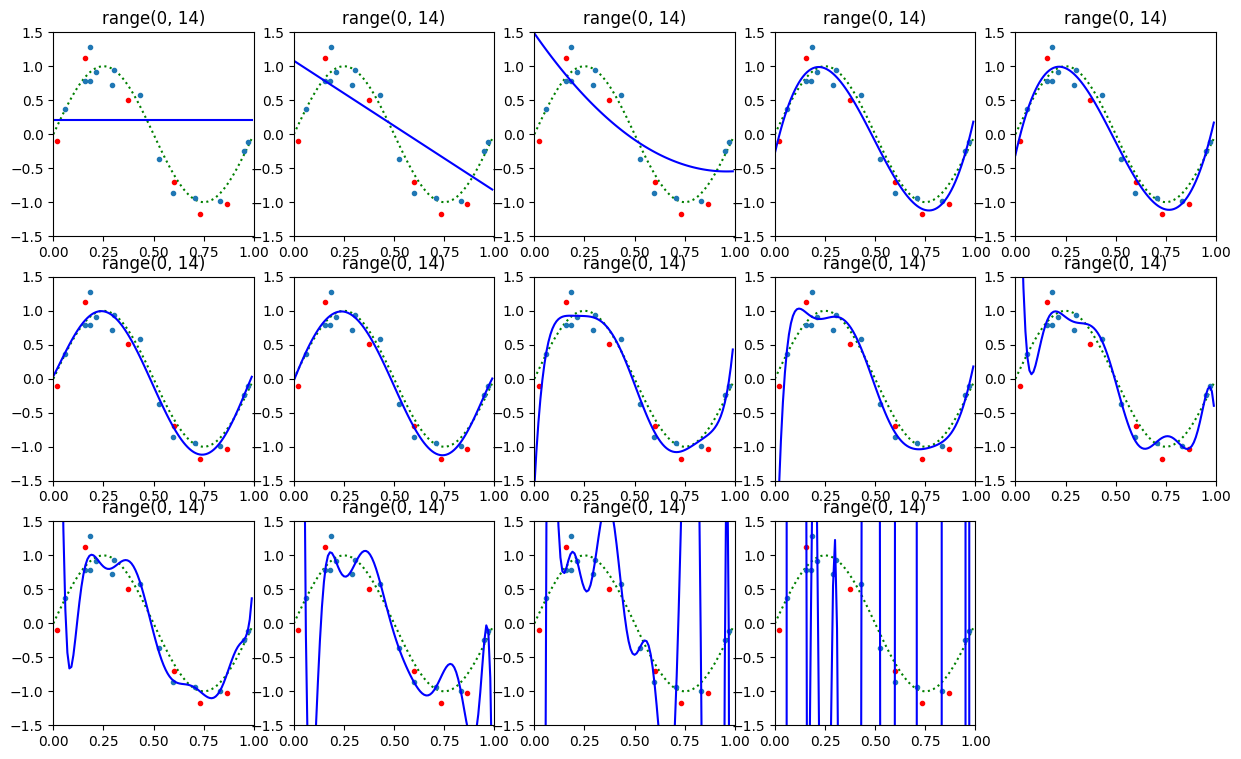

In [52]:
plt.figure(figsize=(15,9))

for p in poly_degrees:
    plt.subplot(3, 5, p+1)

    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, '.r')
    plt.plot(x_all, y_pol, 'b')
    plt.title(poly_degrees)
    plt.axis((0,1,-1.5, 1.5))
    